<a href="https://colab.research.google.com/github/noo-nine/Machine-Learning/blob/main/Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins (1).csv


In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins.shape

(344, 9)

In [ ]:
penguins.drop( columns = ['Unnamed: 0', 'year'], inplace = True)

In [ ]:
cols = penguins.columns
cols

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins.columns = ['species', 'island', 'bill_length', 'bill_depth',
       'flipper_length', 'body_mass', 'sex']

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length', 'bill_depth', 'flipper_length',
       'body_mass', 'sex'],
      dtype='object')

In [ ]:
cols = penguins.columns

In [ ]:
for col in cols:
  print(f'{col} : {penguins[col].unique()}')

species : ['Adelie' 'Gentoo' 'Chinstrap']
island : ['Torgersen' 'Biscoe' 'Dream']
bill_length : [39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.1 50.  48.7 47.6 46.5
 45.4 46.7 43.3 46.8 49.  45.5 48.4 49.3 49.2 46.2 50.2 45.1 46.3 44.5
 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.  49.6 45.3 50.5 43.6 44.9 45.2
 46.6 48.5 50.1 45.  43.8 50.4 45.7 54.3 49.8 49.5 43.5 50.7 47.7 46.4
 48.6 47.5 51.1 52.5 47.4 50.8 43.4 51.3 52.1 52.2 49.4 46.9 55.9 47.2
 41.7 53.4 48.1 51.5 55.1 48.8 49.9 52.7 51.7 47.  52.  45.9 50.3 58.
 42.4 50.6 52.8 54.2 51.  49.7 53.5 50.9 51.4 51.9 55.8]
bill_depth : [18.7 17.4 18.   nan 19.3 20.6 17.8 19.6 18.1 20.2 17.

In [ ]:
penguins.duplicated().sum()

0

In [ ]:
penguins.isna().sum()

,0
species,0
island,0
bill_length,2
bill_depth,2
flipper_length,2
body_mass,2
sex,11


In [ ]:
penguins.dropna(inplace = True)

In [ ]:
penguins.isna().sum()

,0
species,0
island,0
bill_length,0
bill_depth,0
flipper_length,0
body_mass,0
sex,0


Scaling the numerical Parameters

In [ ]:
num_features = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']

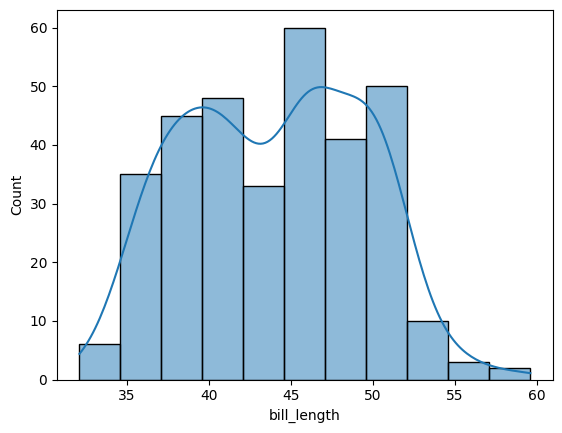

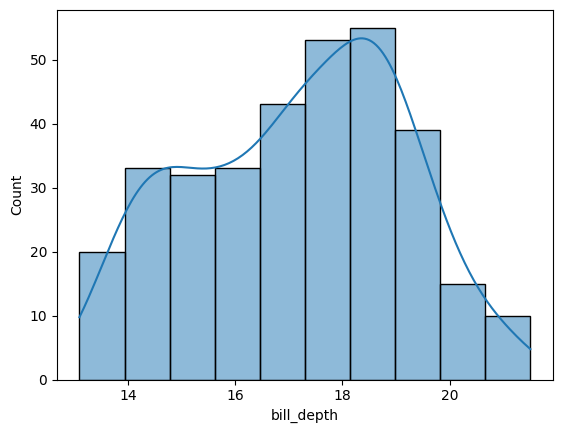

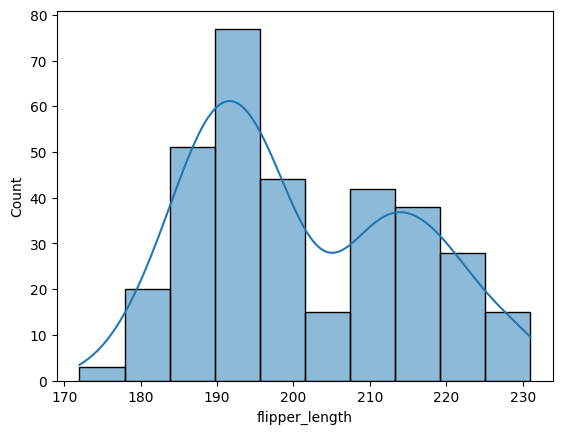

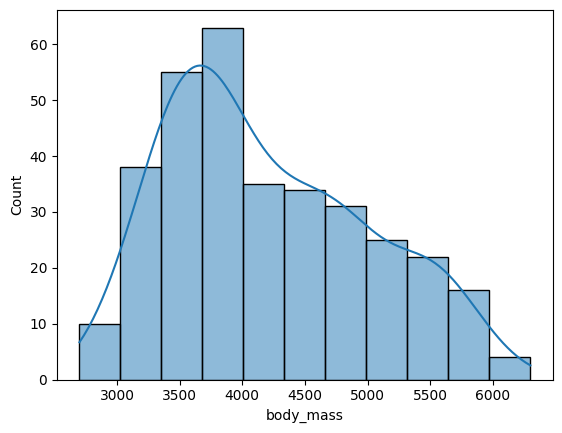

In [ ]:
# plotting the features to get the idea of distribution
for feature in num_features:
  plt.figure()
  sns.histplot( data = penguins, x = feature, kde = True)
  plt.show()

In [ ]:
# getting rid of outliers
for feature in num_features:
  q1 = penguins[feature].quantile(0.25)
  q3 = penguins[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  penguins = penguins[ (penguins[feature] >= lower_bound) & (penguins[feature] <= upper_bound)]

In [ ]:
penguins.shape

(333, 7)

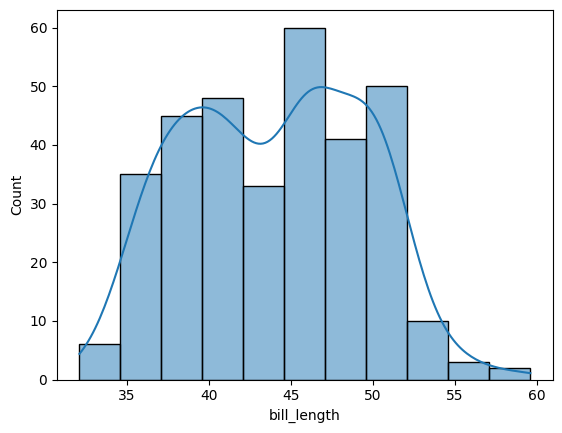

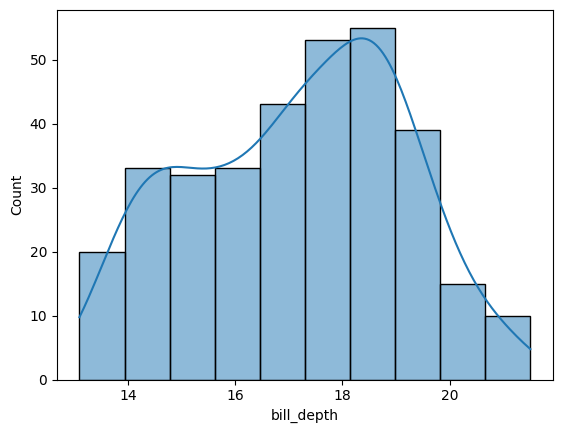

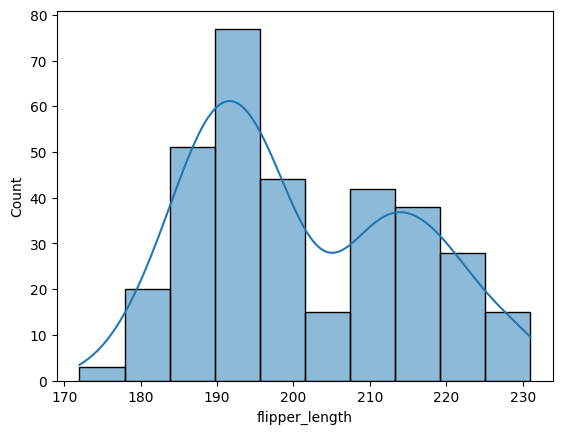

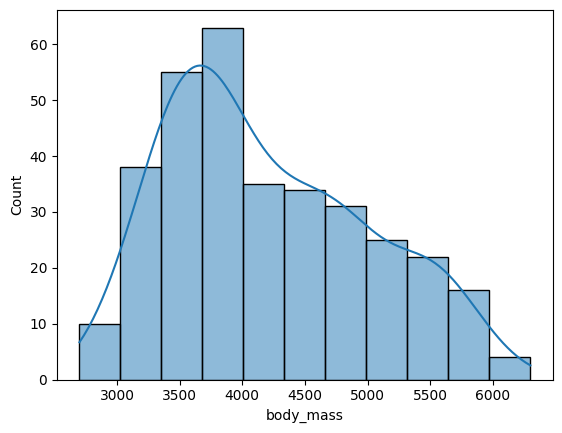

In [ ]:
for feature in num_features:
  plt.figure()
  sns.histplot( data = penguins, x = feature, kde = True)
  plt.show()

In [ ]:
num_data = penguins[num_features]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
penguins[num_features] = scaler.fit_transform(num_data)

In [ ]:
penguins.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,-0.593407,0.451613,-0.695652,-0.244898,male
1,Adelie,Torgersen,-0.549451,0.032258,-0.478261,-0.204082,female
2,Adelie,Torgersen,-0.461538,0.225806,-0.086957,-0.653061,female
4,Adelie,Torgersen,-0.857143,0.645161,-0.173913,-0.489796,female
5,Adelie,Torgersen,-0.571429,1.064516,-0.304348,-0.326531,male


One-Hot Encoding

In [ ]:
cols_to_encode = ['species'	, 'island', 'sex']

In [ ]:
penguins = pd.get_dummies(data = penguins, columns = cols_to_encode, dtype = int)
penguins.head()

,bill_length,bill_depth,flipper_length,body_mass,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,-0.593407,0.451613,-0.695652,-0.244898,1,0,0,0,0,1,0,1
1,-0.549451,0.032258,-0.478261,-0.204082,1,0,0,0,0,1,1,0
2,-0.461538,0.225806,-0.086957,-0.653061,1,0,0,0,0,1,1,0
4,-0.857143,0.645161,-0.173913,-0.489796,1,0,0,0,0,1,1,0
5,-0.571429,1.064516,-0.304348,-0.326531,1,0,0,0,0,1,0,1


In [ ]:
penguins.head()

,bill_length,bill_depth,flipper_length,body_mass,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,-0.593407,0.451613,-0.695652,-0.244898,True,False,False,False,False,True,False,True
1,-0.549451,0.032258,-0.478261,-0.204082,True,False,False,False,False,True,True,False
2,-0.461538,0.225806,-0.086957,-0.653061,True,False,False,False,False,True,True,False
4,-0.857143,0.645161,-0.173913,-0.489796,True,False,False,False,False,True,True,False
5,-0.571429,1.064516,-0.304348,-0.326531,True,False,False,False,False,True,False,True


In [66]:
penguins.duplicated().sum()

0

In [65]:
penguins.isna().sum()

,0
bill_length,0
bill_depth,0
flipper_length,0
body_mass,0
species_Adelie,0
species_Chinstrap,0
species_Gentoo,0
island_Biscoe,0
island_Dream,0
island_Torgersen,0


Preparing training and test sets

In [ ]:
x = penguins.drop(columns = ['body_mass'])
y = penguins[['body_mass']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 28)

Initial Regression Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor()
r_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, r_dt.predict(x_test))
r2 = r2_score(y_test, r_dt.predict(x_test))
print(f'MSE : {mse}')
print(f'R2 : {r2}')

MSE : 0.12804684556038157
R2 : 0.6437879562134888


[Text(0.5429144538421191, 0.975, 'species_Gentoo <= 0.5\nsquared_error = 0.455\nsamples = 249\nvalue = 0.131'),
 Text(0.3158807041699449, 0.925, 'sex_male <= 0.5\nsquared_error = 0.126\nsamples = 155\nvalue = -0.303'),
 Text(0.42939757900603204, 0.95, 'True  '),
 Text(0.1899996721741411, 0.875, 'bill_depth <= 0.435\nsquared_error = 0.053\nsamples = 81\nvalue = -0.543'),
 Text(0.11642735378966693, 0.825, 'bill_length <= 0.093\nsquared_error = 0.051\nsamples = 71\nvalue = -0.572'),
 Text(0.06159847888801469, 0.775, 'bill_depth <= -0.371\nsquared_error = 0.042\nsamples = 54\nvalue = -0.616'),
 Text(0.01888276947285602, 0.725, 'bill_length <= -1.137\nsquared_error = 0.004\nsamples = 3\nvalue = -0.85'),
 Text(0.014686598478888015, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = -0.939'),
 Text(0.023078940466824023, 0.675, 'bill_depth <= -0.435\nsquared_error = 0.0\nsamples = 2\nvalue = -0.806'),
 Text(0.01888276947285602, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = -0.816'),
 Text(0

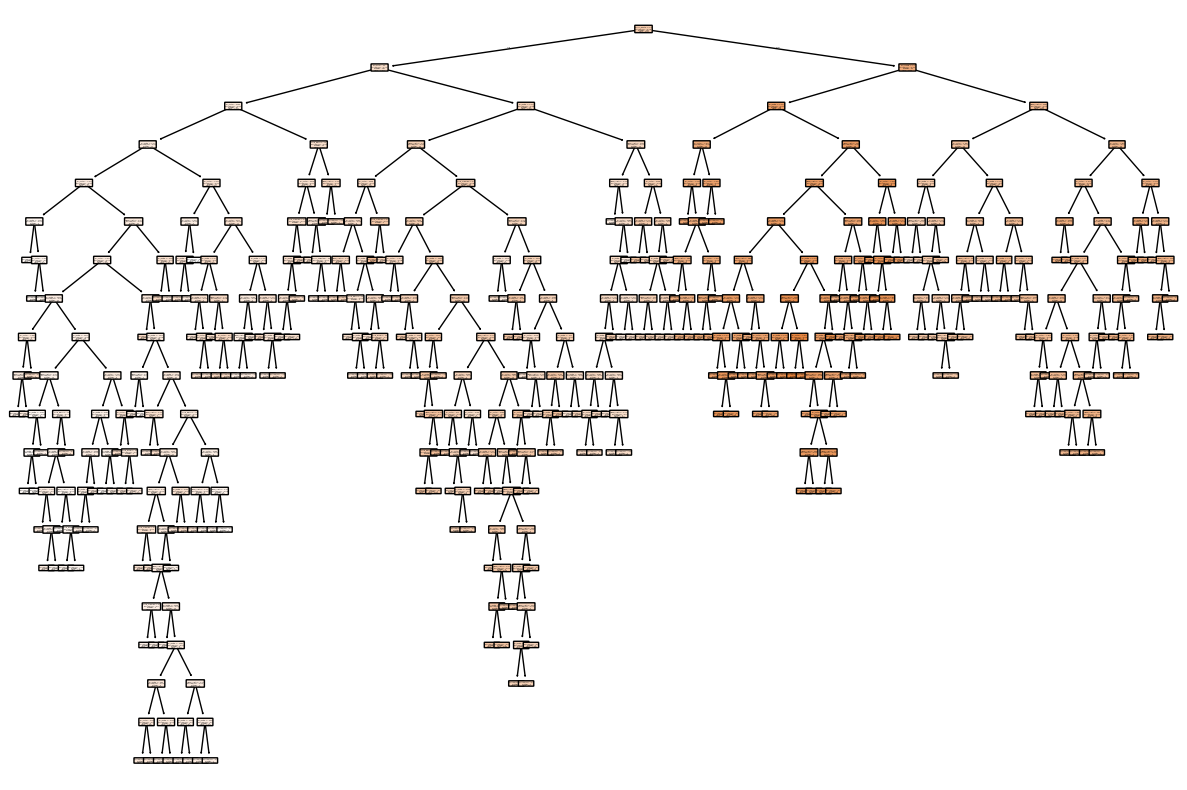

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(r_dt, filled = True, rounded = True, feature_names = x.columns)

Cost Complexity Pruning

In [61]:
path = r_dt.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[ : -1]

In [62]:
r_dts = []
for alpha in alphas:
  r_dt = DecisionTreeRegressor(random_state = 55, ccp_alpha = alpha)
  r_dt.fit(x_train, y_train)
  r_dts.append(r_dt)

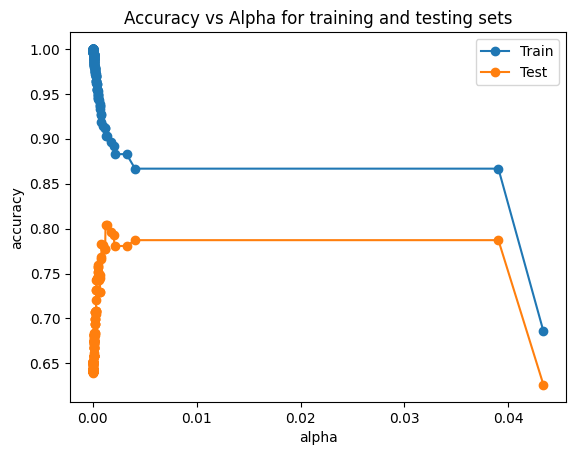

In [64]:
train_scores = [r_dt.score(x_train, y_train) for r_dt in r_dts]
test_scores = [r_dt.score(x_test, y_test) for r_dt in r_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
line1 = ax.plot(alphas, train_scores, marker = 'o', label = 'Train')
line2 = ax.plot(alphas, test_scores, marker = 'o', label = 'Test')
ax.legend()
plt.show()

In [ ]:
# from the graph let the optimal value of alpha be 0.005

5-Fold Cross Validation

<Axes: xlabel='tree'>

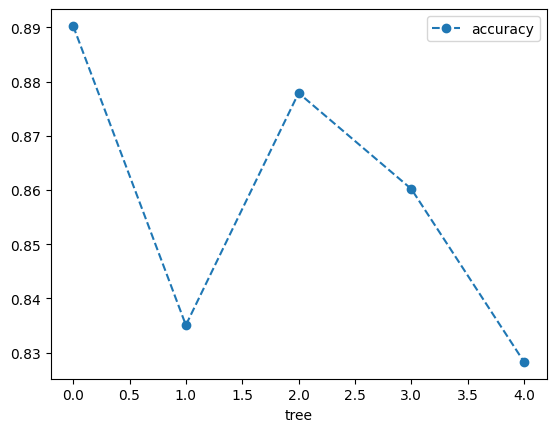

In [67]:
from sklearn.model_selection import cross_val_score
r_dt = DecisionTreeRegressor(random_state = 31, ccp_alpha = 0.005)
# 5-fold cross validation
cv_scores = cross_val_score(r_dt, x_train, y_train, cv = 5)
df = pd.DataFrame( data = {'tree' : range(5), 'accuracy' : cv_scores})
df.plot( x = 'tree', y = 'accuracy' , marker = 'o', linestyle = '--')

In [68]:
alpha_loop_values = []
for alpha in alphas:
  r_dt = DecisionTreeRegressor(random_state = 45, ccp_alpha = alpha)
  cv_scores = cross_val_score(r_dt, x_train, y_train, cv = 5)
  alpha_loop_values.append([alpha, np.mean(cv_scores), np.std(cv_scores)])

<Axes: xlabel='alpha'>

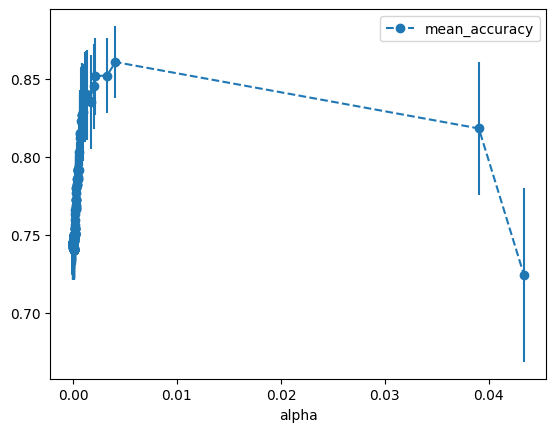

In [69]:
# creating a dataframe
alpha_results = pd.DataFrame( alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [70]:
# finding the exact value of optimal alpha
ideal_alpha = alpha_results.loc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_alpha

0.004085908852802512

# **Building Pruned Regression Tree**

In [71]:
rt_pruned = DecisionTreeRegressor(random_state = 77, ccp_alpha = ideal_alpha)
rt_pruned.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.004085908852802512, random_state=77)

In [72]:
mse_pruned = mean_squared_error(y_test, rt_pruned.predict(x_test))
r2_pruned = r2_score(y_test, rt_pruned.predict(x_test))
print(f'MSE_pruned : {mse_pruned}')
print(f'R2_pruned : {r2_pruned}')

MSE_pruned : 0.07652041067698677
R2_pruned : 0.7871287515179034


In [ ]:
# now we know the ideal value of alpha
# we are going to construct the regression tree using this alpha parameter
# we will get a pruned regression tree

[Text(0.5, 0.8333333333333334, 'species_Gentoo <= 0.5\nsquared_error = 0.455\nsamples = 249\nvalue = 0.131'),
 Text(0.25, 0.5, 'sex_female <= 0.5\nsquared_error = 0.126\nsamples = 155\nvalue = -0.303'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.075\nsamples = 74\nvalue = -0.041'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.053\nsamples = 81\nvalue = -0.543'),
 Text(0.75, 0.5, 'sex_female <= 0.5\nsquared_error = 0.171\nsamples = 94\nvalue = 0.848'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.057\nsamples = 48\nvalue = 1.18'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.054\nsamples = 46\nvalue = 0.502')]

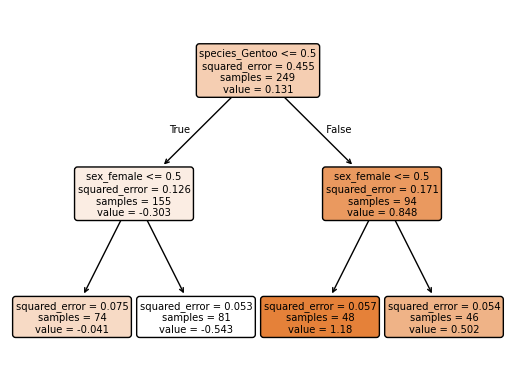

In [74]:
from sklearn.tree import plot_tree
plot_tree(rt_pruned, filled = True, rounded = True, feature_names = x.columns)